In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\Iris.csv')

In [3]:
df.drop(['Id','Species'], axis=1, inplace=True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


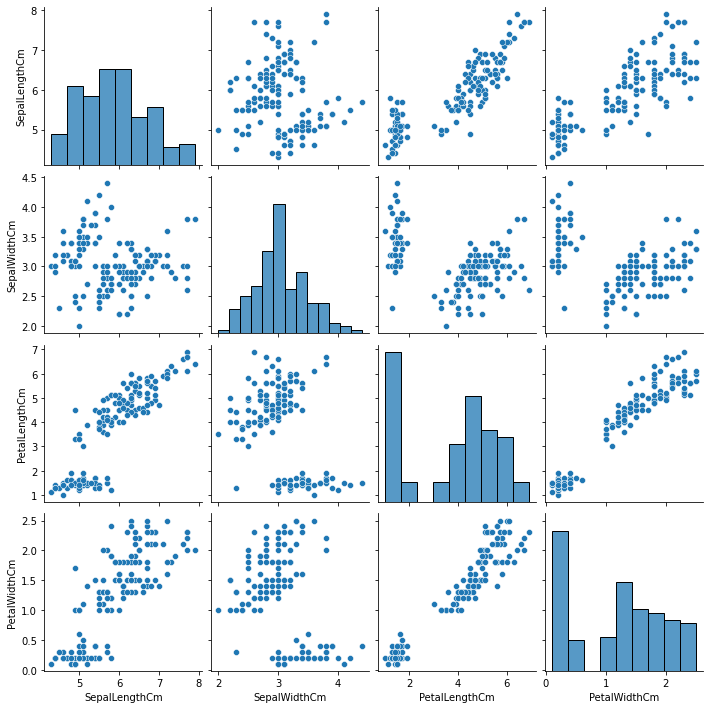

In [8]:
sns.pairplot(data=df)

In [9]:
df_norm = (df-df.min())/(df.max()-df.min())

In [10]:
df_norm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


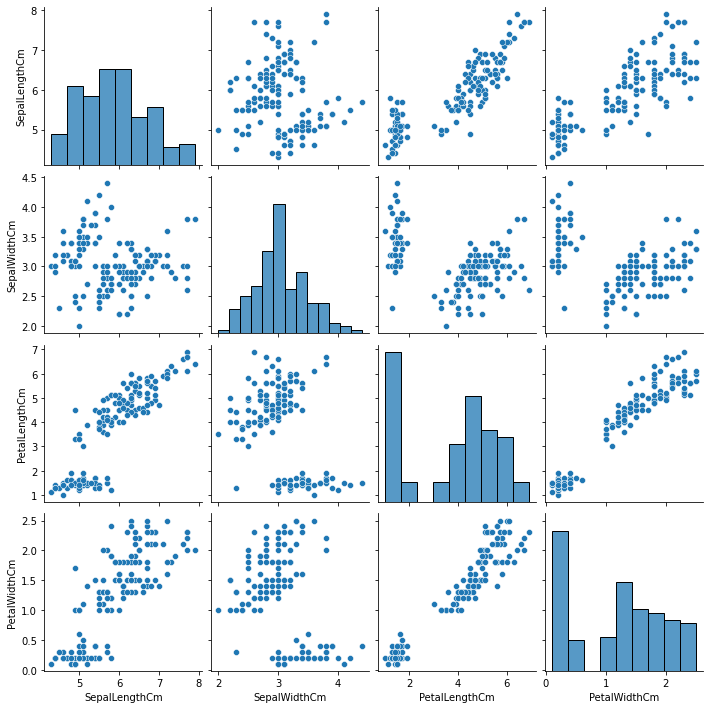

In [11]:
sns.pairplot(data=df)

In [12]:
centers = df.sample(3)

In [13]:
centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
124,6.7,3.3,5.7,2.1
140,6.7,3.1,5.6,2.4
106,4.9,2.5,4.5,1.7


In [14]:
distances = np.zeros((len(df.index),3))

In [15]:
distances

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [16]:
for i in range(3):
    distances[:,i] = (((df.iloc[:, :] - centers.iloc[i, :]) ** 2).sum(axis=1)) ** 0.5
distances

array([[4.96990946, 5.01996016, 3.591657  ],
       [5.04281667, 5.07247474, 3.47994253],
       [5.19422757, 5.22876658, 3.60832371],
       [5.06951674, 5.10489961, 3.42052628],
       [5.00799361, 5.06162029, 3.61662826],
       [4.57602448, 4.64112055, 3.42636834],
       [5.11370707, 5.15266921, 3.53128872],
       [4.91426495, 4.96286208, 3.47419055],
       [5.24880939, 5.27351875, 3.50285598],
       [4.99199359, 5.03388518, 3.4525353 ],
       [4.80624594, 4.86826458, 3.59722115],
       [4.90306027, 4.95378643, 3.38821487],
       [5.11761663, 5.15266921, 3.52562051],
       [5.56866232, 5.59553393, 3.83796821],
       [5.01597448, 5.08133841, 4.02492236],
       [4.76864761, 4.84767986, 3.86522962],
       [4.92950302, 4.98196748, 3.76031914],
       [4.93254498, 4.97694686, 3.55105618],
       [4.52658812, 4.594562  , 3.48281495],
       [4.86723741, 4.92645917, 3.56230263],
       [4.61627556, 4.67225855, 3.33916157],
       [4.82182538, 4.87134478, 3.48855271],
       [5.

In [17]:
closest = np.argmin(distances, axis = 1)

In [18]:
closest

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [19]:
for i in range(len(centers.index)):
    centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
124       6.722222      3.038889       5.369444          1.75
140       6.700000      3.100000       5.600000          2.40
106       4.900000      2.500000       4.500000          1.70
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
124       6.722222      3.038889       5.369444          1.75
140       6.590909      2.990909       5.490909          2.20
106       4.900000      2.500000       4.500000          1.70
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
124       6.722222      3.038889       5.369444      1.750000
140       6.590909      2.990909       5.490909      2.200000
106       5.320652      3.075000       2.714130      0.743478


In [20]:
centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
124,6.722222,3.038889,5.369444,1.750000
140,6.590909,2.990909,5.490909,2.200000
106,5.320652,3.075000,2.714130,0.743478


In [21]:
# np.random.seed(4160659)
# X[closest == 0].mean(axis=0)
centers = df.sample(3)
distances = np.zeros((len(df.index),3))


while True:
    old_closest = closest.copy()
    print(closest)
    
    for i in range(3):
        distances[:,i] = (((df.iloc[:, :] - centers.iloc[i,:])**2).sum(axis=1))**0.5
    closest = np.argmin(distances, axis = 1)

    for i in range(len(centers.index)):
        centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)
    if all(closest == old_closest):
        break

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 1 0 2 0 0 0 0
 1 1 2 1 1 0 0 1 2 1 2 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 2 0 1 1 1 1
 1 0]
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
27        5.257692      3.611538       1.592308      0.303846
121       6.273737      2.875758       4.925253      1.681818
40        4.748000      3.180000       1.392000      0.216000
[0 2 2 2 2 0 2 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 2 0
 2 2 0 2 2 2 2 0 2 0 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
27        5.259259      3.637037       1.559259      0.322222
121       6.2877

In [22]:
closest

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
df['new_column'] = closest.tolist()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

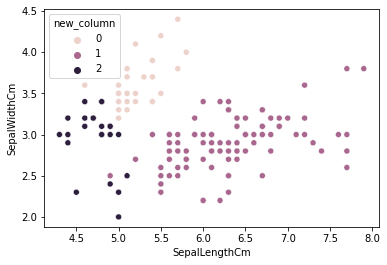

In [24]:
sns.scatterplot(data=df,x= 'SepalLengthCm',y= 'SepalWidthCm', hue='new_column', cmap='rainbow')

In [25]:
df_check = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\Iris.csv')

In [26]:
df_check.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

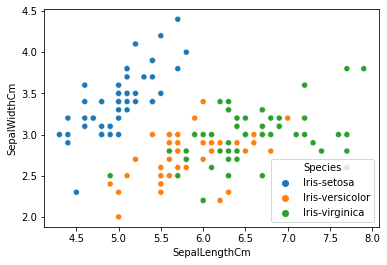

In [27]:
sns.scatterplot(data=df_check,x= 'SepalLengthCm',y= 'SepalWidthCm', hue='Species')

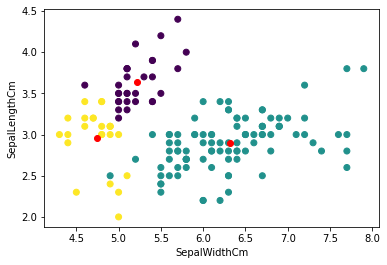

In [28]:
color=['blue','green','cyan']
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'], c=closest)
plt.scatter(centers["SepalLengthCm"],centers["SepalWidthCm"],c='red')
plt.xlabel('SepalWidthCm')
plt.ylabel('SepalLengthCm')
plt.show()
